# Using TensorFlow and Keras for Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Information
https://www.kaggle.com/harlfoxem/housesalesprediction

## Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

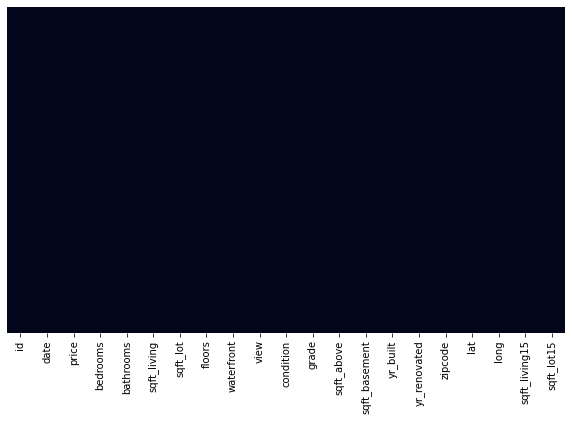

In [3]:
# See visually any missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [4]:
# See if there is any missing data, apparently there are no null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Basic statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


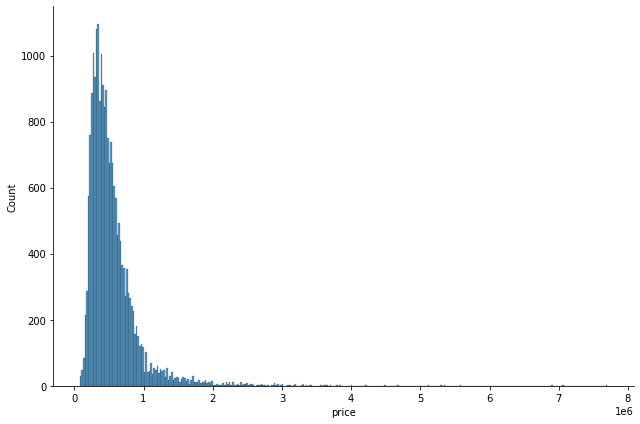

In [6]:
# Better resolution = .fig.set_dpi(300)
# Can predict acurately houses with the price point from 0 - 2.5 million. Anything more will not be accurate due the the small sample size for higher price points.
sns.displot(df['price'],height=6, aspect=1.5)


c:\Users\on3mo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

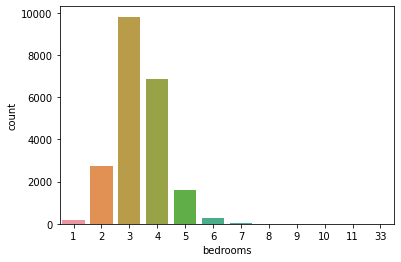

In [7]:
# Vast majority of houses has 2-5 bedrooms
sns.countplot(df['bedrooms'])

In [8]:
# You can see there is a huge mansion with 33 bedrooms as an outlier.
df['bedrooms'].value_counts().reset_index().sort_values('index').set_index('index')

,bedrooms
index,
1,196
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13
9,6


In [9]:
# Look for highly correlated features
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

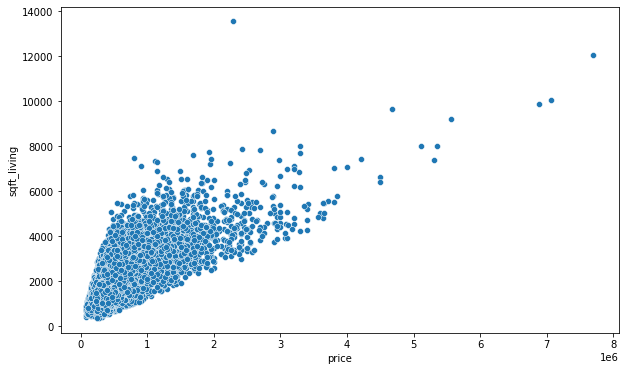

In [10]:
# Strong linear relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='sqft_living')

In [11]:
df.corr()['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_above       0.876448
grade            0.762779
sqft_living15    0.756402
bathrooms        0.755758
price            0.701917
bedrooms         0.578212
sqft_basement    0.435130
floors           0.353953
yr_built         0.318152
view             0.284709
long             0.241214
sqft_lot15       0.184342
sqft_lot         0.173453
waterfront       0.103854
yr_renovated     0.055308
lat              0.052155
id              -0.012241
condition       -0.059445
zipcode         -0.199802
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

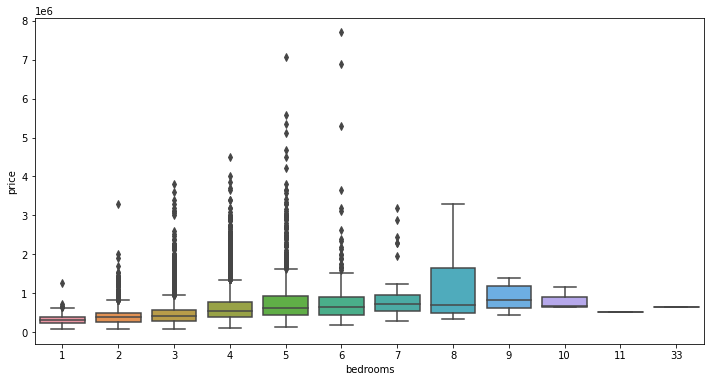

In [12]:
# Showing the distribution of prices/bedrooms
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

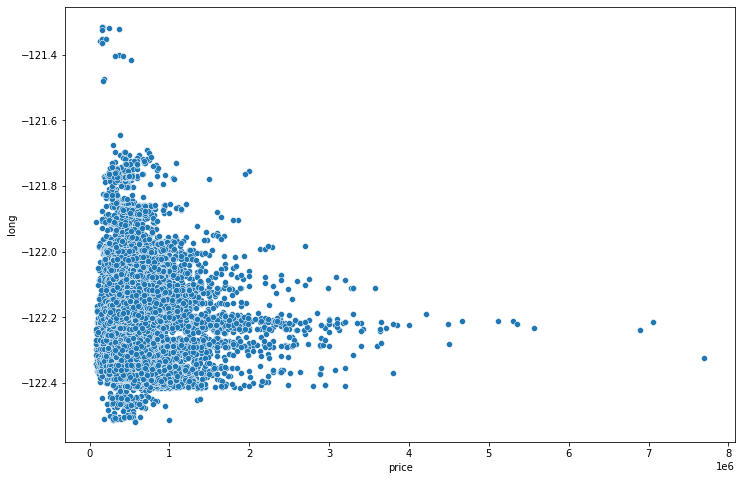

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

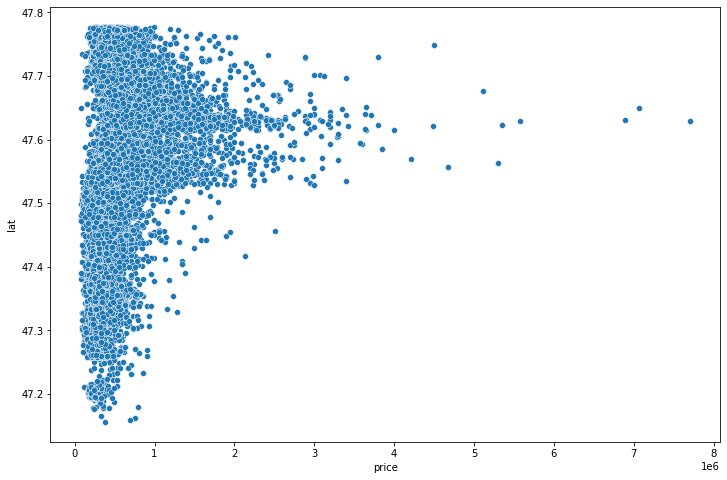

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

### By looking at a combination of longitude and latitude, you can see there is a certain combination where certain locations are more expensive than other locations.

<AxesSubplot:xlabel='long', ylabel='lat'>

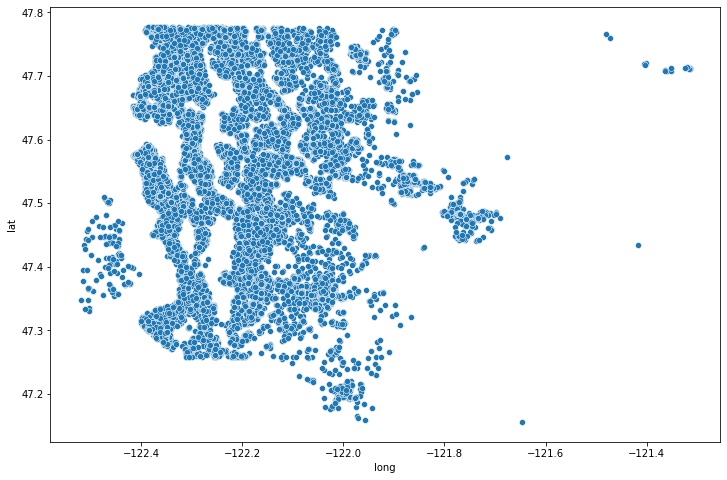

In [15]:
# Plotting both lat and long to show a simple map visualization
# This follows pretlly closely to the shape of King County in Seattle
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

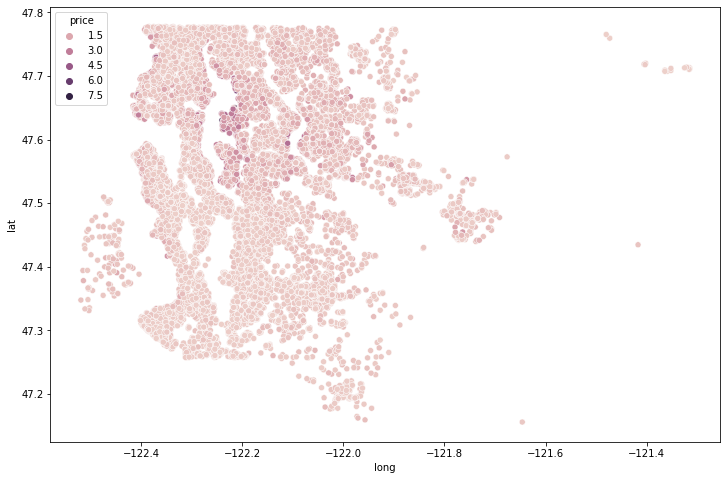

In [16]:
# Addding a gradient to show better locations with higher prices
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [17]:
# Going to remove top 1% of highest prices to show a better gradient on the map
len(df)*.01

215.97

In [18]:
# 1% of data is around 216, therefore another DF will be created slicing these out
removed_1percent = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

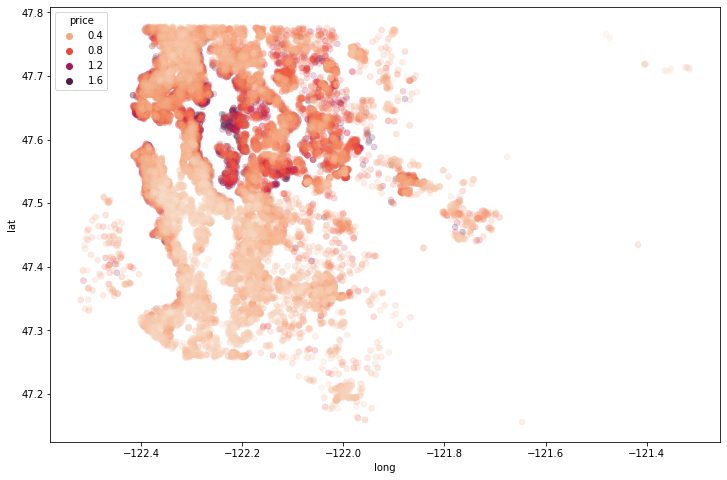

In [19]:
# Better visualized, houses near the edge of water are more expensive.
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=removed_1percent, 
    hue='price',
    edgecolor=None,
    alpha=0.2,
    palette='rocket_r')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

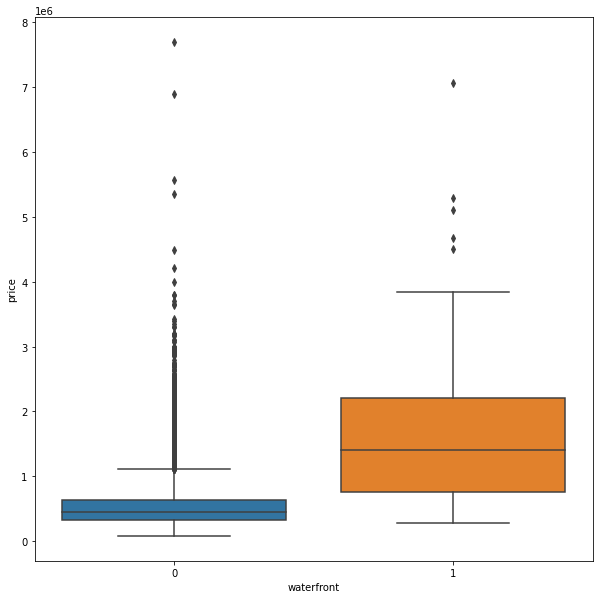

In [20]:
# To further validate this, you can see the distribution of the waterfront prices.
plt.figure(figsize=(10,10))
sns.boxplot(x='waterfront', y='price', data=df)

In [21]:
df = df.drop('id', axis=1)

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
# Some feature engineering
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df['day'] = df['date'].apply(lambda date: date.day)

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


<AxesSubplot:xlabel='month', ylabel='price'>

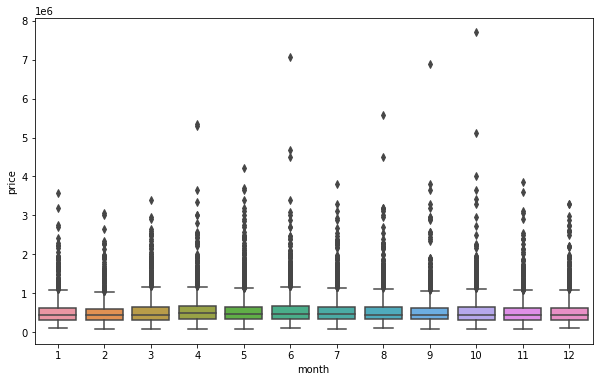

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

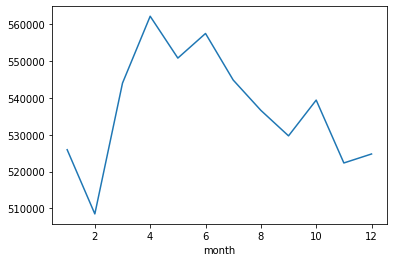

In [26]:
df.groupby('month').describe()['price']['mean'].plot()

In [27]:
df = df.drop('date', axis=1)

In [28]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [29]:
df = df.drop('zipcode', axis=1)

In [30]:
# This feature will be kept since houses get higeher priced if renovated more recently
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
# Keeping this feature as well since it follows as a continuos variable since more sqft gives a higer price value 
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [32]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()

In [41]:
X_train.shape

(15117, 20)

In [42]:
from pickletools import optimize


model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit(x=X_train,y=y_train,
validation_data=(X_test,y_test),
batch_size=128,
epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 425809117184.0000 - val_loss: 429136936960.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 423671005184.0000 - val_loss: 421752930304.0000
Epoch 3/400
119/119 [==============================] - 0s 1000us/step - loss: 396960792576.0000 - val_loss: 362050945024.0000
Epoch 4/400
119/119 [==============================] - 0s 983us/step - loss: 286325440512.0000 - val_loss: 198789414912.0000
Epoch 5/400
119/119 [==============================] - 0s 966us/step - loss: 137491841024.0000 - val_loss: 104235827200.0000
Epoch 6/400
119/119 [==============================] - 0s 970us/step - loss: 102424805376.0000 - val_loss: 99851771904.0000
Epoch 7/400
119/119 [==============================] - 0s 975us/step - loss: 100292149248.0000 - val_loss: 98083758080.0000
Epoch 8/400
119/119 [==============================] - 0s 966us/step - loss: 98443526144.0000 - val_loss: 96229416960.0000
Epoch 9

### After the model has been fitted, we can convert to a DF to compare training and validation loss

In [44]:
model.history.history

{'loss': [425809117184.0,
  423671005184.0,
  396960792576.0,
  286325440512.0,
  137491841024.0,
  102424805376.0,
  100292149248.0,
  98443526144.0,
  96550625280.0,
  94588796928.0,
  92553699328.0,
  90420363264.0,
  88236802048.0,
  85886828544.0,
  83419668480.0,
  80810131456.0,
  78036148224.0,
  75189157888.0,
  72353226752.0,
  69379088384.0,
  66508709888.0,
  63714549760.0,
  61104619520.0,
  58736152576.0,
  56687636480.0,
  54965874688.0,
  53543469056.0,
  52392517632.0,
  51415326720.0,
  50505826304.0,
  49781325824.0,
  49094381568.0,
  48488570880.0,
  47872557056.0,
  47309930496.0,
  46848954368.0,
  46280765440.0,
  45817987072.0,
  45364183040.0,
  44907130880.0,
  44440240128.0,
  44030279680.0,
  43722608640.0,
  43281928192.0,
  43062575104.0,
  42597699584.0,
  42301739008.0,
  41948127232.0,
  41670225920.0,
  41308348416.0,
  40968859648.0,
  40665866240.0,
  40305156096.0,
  39987875840.0,
  39672774656.0,
  39364194304.0,
  39078629376.0,
  38832320512.0,

In [45]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

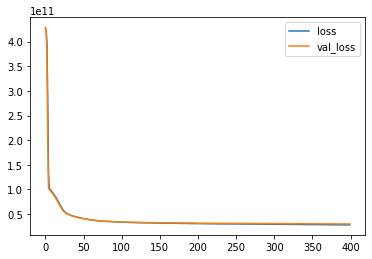

In [46]:
losses.plot()

 There is decrease in both training loss and validation loss, which is what we want.
 - There is no increase in loss in validation set, meaning we could continue fitting without overfitting our training data
 - Any spikes up of validation loss indicates we are overfitting

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [48]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 540us/step


In [49]:
predictions

array([[316646.88],
       [299538.25],
       [565233.44],
       ...,
       [376136.38],
       [816569.7 ],
       [697680.06]], dtype=float32)

In [50]:
np.sqrt(mean_squared_error(y_test,predictions))

173300.8768519881

In [51]:
mean_absolute_error(y_test,predictions)

106685.27170500578

In [52]:
results = pd.DataFrame(index=['MSE', 'RMSE', 'MAE', 'R^2'])
results['Original'] = [
    mean_squared_error(y_test, predictions),
    np.sqrt(mean_squared_error(y_test, predictions)),
    mean_absolute_error(y_test, predictions), 
    explained_variance_score(y_test, predictions)
    ]

In [53]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Our mean is around 540,000 for house prices, therefore the 104,610 MAE is not great

For a deeper understanding, we can use explained variance score.

In [54]:
explained_variance_score(y_test, predictions)

0.7765210448207956

This is okay, but depends if we had a previous model that peforms better than this one

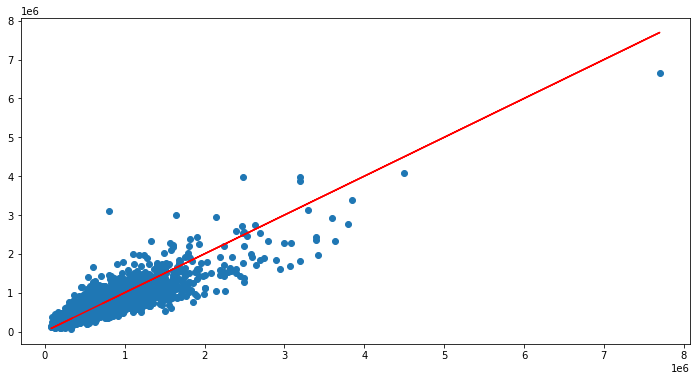

In [55]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # plot a red line to show the perfect prediction line

We are being punished by the outliers or expensive houses, we are not good at predicting their price, however we are good at predicting the lower tier houses

In [56]:
# Grab one house from the dataframe
single_house = df.drop('price', axis=1).iloc[0]

In [57]:
# Grab values and reshape in order to rescale
single_house.values.reshape(-1,20)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  1.30000e+01]])

In [58]:
scaler.transform(single_house.values.reshape(-1,20))

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57158945, 0.21760797,
        0.16476974, 0.00574235, 0.        , 0.81818182, 0.4       ]])

In [59]:
single_house = scaler.transform(single_house.values.reshape(-1,20))

In [60]:
# predict price for single house
model.predict(single_house)

1/1 [==============================] - 0s 13ms/step


array([[287084.34]], dtype=float32)

In [61]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
day                  13.0000
Name: 0, dtype: float64

You can see when predicting one house, the model overpredicted. This is in part due to fitting our model to the expensive houses that are outliers. The next step would be to refit the model to get better results by removing higher priced houses.

In [62]:
# See how many rows there are
len(df)

21597

In [63]:
# Grab only 1 % of top priced houses
len(df) * .01

215.97

In [64]:
# Remove top 1% of highly priced houses by splicing
df_new = df.sort_values('price', ascending=False).reset_index(drop=True).iloc[217:]
df.sort_values('price', ascending=False).reset_index(drop=True).iloc[217:]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
217,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,47.5632,-122.215,3700,14486,2014,10,15
218,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,47.5287,-122.220,3730,16560,2015,2,13
219,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,0,47.6422,-122.157,3900,35237,2015,4,22
220,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1560,1963,0,47.7165,-122.259,2630,13868,2015,4,21
221,1950000.0,4,2.50,3440,14554,2.0,1,4,3,8,...,1270,2012,0,47.7364,-122.286,3170,11810,2015,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,82500.0,2,1.00,520,22334,1.0,0,0,2,5,...,0,1951,0,47.4799,-122.296,1572,10570,2014,5,8
21593,82000.0,3,1.00,860,10426,1.0,0,0,3,6,...,0,1954,0,47.4987,-122.341,1140,11250,2014,11,5
21594,81000.0,2,1.00,730,9975,1.0,0,0,1,5,...,0,1943,0,47.4808,-122.315,860,9000,2015,3,24
21595,80000.0,1,0.75,430,5050,1.0,0,0,2,4,...,0,1912,0,47.6499,-121.909,1200,7500,2014,5,23


# Refitting model by removing top 1% of highly priced houses

In [65]:
X = df_new.drop('price', axis=1).values
y = df_new['price'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=.3)

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [69]:
model.fit(x=X_train,y=y_train,
validation_data=(X_test,y_test),
batch_size=128,
epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 2ms/step - loss: 179376996352.0000 - val_loss: 31700926464.0000
Epoch 2/400
117/117 [==============================] - 0s 1ms/step - loss: 29036777472.0000 - val_loss: 25067378688.0000
Epoch 3/400
117/117 [==============================] - 0s 1ms/step - loss: 25157838848.0000 - val_loss: 22857625600.0000
Epoch 4/400
117/117 [==============================] - 0s 1ms/step - loss: 23793205248.0000 - val_loss: 22057256960.0000
Epoch 5/400
117/117 [==============================] - 0s 1ms/step - loss: 23243892736.0000 - val_loss: 21621858304.0000
Epoch 6/400
117/117 [==============================] - 0s 1ms/step - loss: 22936836096.0000 - val_loss: 21408524288.0000
Epoch 7/400
117/117 [==============================] - 0s 1ms/step - loss: 22740480000.0000 - val_loss: 21157081088.0000
Epoch 8/400
117/117 [==============================] - 0s 1ms/step - loss: 22648311808.0000 - val_loss: 21152303104.0000
Epoch 9/400
117/117 [==========

In [70]:
predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'R^2: {explained_variance_score(y_test, predictions)}')


201/201 [==============================] - 0s 570us/step
MSE: 11247496245.55839
RMSE: 106054.2137095853
MAE: 69935.6060765513
R^2: 0.8543683494958908


In [71]:
results['Removing One Percent'] = [
    mean_squared_error(y_test, predictions),
    np.sqrt(mean_squared_error(y_test, predictions)),
    mean_absolute_error(y_test, predictions), 
    explained_variance_score(y_test, predictions)
    ]

In [72]:
model.predict(single_house)

1/1 [==============================] - 0s 12ms/step


array([[250519.78]], dtype=float32)

# You can see by just removing top 1% of higher priced houses, our model does better

In [73]:
results

,Original,Removing One Percent
MSE,3.003319e+10,1.124750e+10
RMSE,1.733009e+05,1.060542e+05
MAE,1.066853e+05,6.993561e+04
R^2,7.765210e-01,8.543683e-01


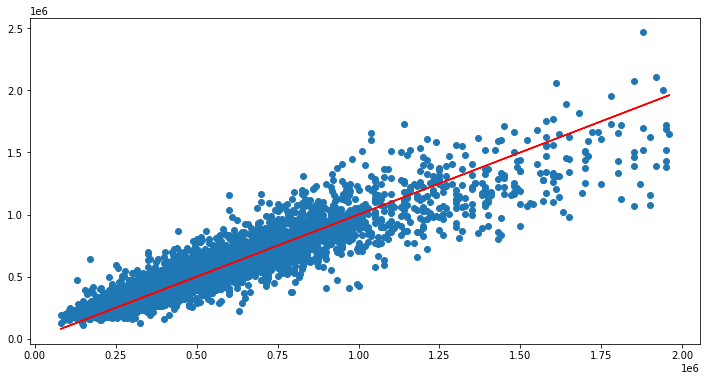

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')